In [2]:
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import helpers
%matplotlib inline

In [3]:
dir_training_img = 'day_night_images/training/'
dir_test_img = 'day_night_images/test/'

day


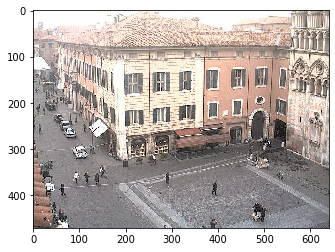

In [4]:
IMAGE_LIST = helpers.load_dataset(dir_training_img)
# day image
plt.imshow(IMAGE_LIST[0][0])
print(IMAGE_LIST[0][1])

night


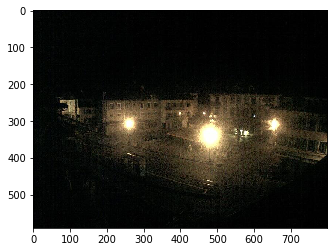

In [5]:
# night image
plt.imshow(IMAGE_LIST[140][0])
print(IMAGE_LIST[140][1])

In [6]:
# images are not of same size 

# resizing images 

def standerdized_input(img):
    resized_img = cv2.resize(img, (1100, 600))
    return resized_img

In [7]:
# label encoder 

def label_encoder(label):
    class_label = 0
    if(label=='day'):
        class_label = 1
    return class_label

In [8]:
#

def standardize(image_list):
    labeled_img = []
    for img in image_list:
        im = img[0]
        label = img[1]
        
        #standardize the image
        standardized_im = standerdized_input(im)
        #encode the label
        label_en = label_encoder(label)
        
        labeled_img.append((standardized_im, label_en))
    return labeled_img
STANDARDIZED_LIST = standardize(IMAGE_LIST)

In [9]:
STANDARDIZED_LIST[100][1]

1

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


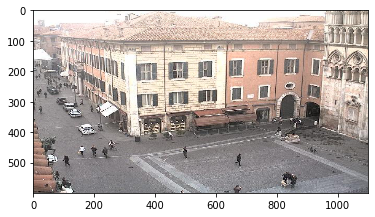

In [10]:
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

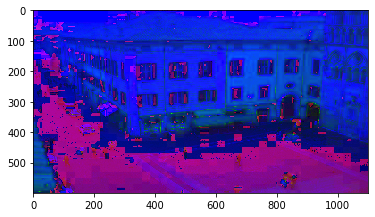

In [11]:
# convert rgb to hsv image 

hsv_image = cv2.cvtColor(selected_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)

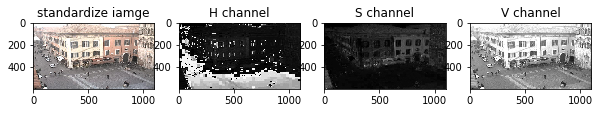

In [12]:
h = hsv_image[:,:,0] 
s = hsv_image[:,:,1]
v = hsv_image[:,:,2]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(10,20))
ax1.set_title('standardize iamge')
ax1.imshow(selected_image)
ax2.set_title("H channel")
ax2.imshow(h, cmap = 'gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title("V channel")
ax4.imshow(v, cmap='gray')

In [13]:
# the main feature that can distinguish between day and night images may be the brightness of the image 
# brightness between day and night images can be the main factor 
# finding the brightness of a single pixel and then finding the average brightness of the image 

def average_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    single_pic_brightness = np.sum(hsv[:,:,2])
    #finding the average brightness of single image 
    area = 1100*600
    average_brightness = single_pic_brightness / area
    return average_brightness


(600, 1100, 3)


171.00230757575758

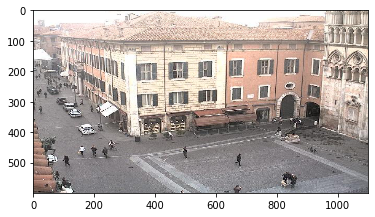

In [14]:
plt.imshow(selected_image)
print(selected_image.shape)

average_brightness(selected_image)

(737, 1024, 3)


29.614086363636364

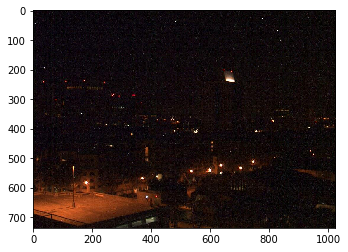

In [15]:
night_demo_image = IMAGE_LIST[130][0]
plt.imshow(night_demo_image)
print(night_demo_image.shape)
average_brightness(night_demo_image)

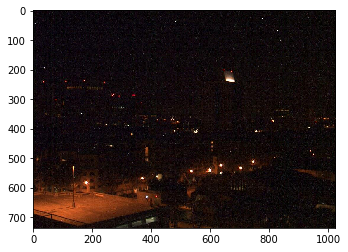

In [16]:
plt.imshow(night_demo_image)

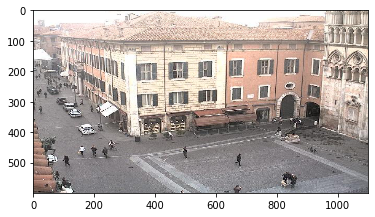

In [17]:
plt.imshow(selected_image)

In [18]:
average_brightness(selected_image)

171.00230757575758

In [19]:
average_brightness(night_demo_image)

29.614086363636364

In [20]:
def classifier(rgb_image):
    brightness = average_brightness(rgb_image)
    plt.imshow(rgb_image)
    estimated_label = 0
    print("Label [1 = day, 0 = night]: ")
    threshold = 120
    if(brightness > threshold):
        estimated_label = 1
    
    return estimated_label


Label [1 = day, 0 = night]: 


0

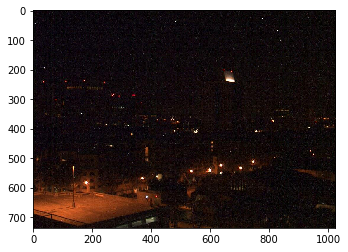

In [21]:
classifier(night_demo_image)

In [22]:
# testing on test images
import random
TEST_IMAGE_LIST = helpers.load_dataset(dir_test_img)

#standardize test images
STANDARDIZE_TEST_IMAGES = standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZE_TEST_IMAGES)

In [27]:
image_index = 88
selected_testimg= STANDARDIZE_TEST_IMAGES[image_index][0]
selected_testimg_label = STANDARDIZE_TEST_IMAGES[image_index][1]


Label [1 = day, 0 = night]: 


1

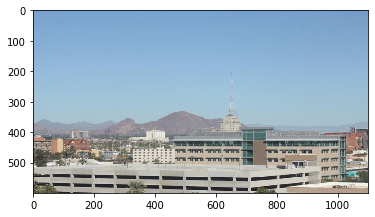

In [28]:
classifier(selected_testimg)